## Looking at the station status data i'm downloading from the live feed
- Data is read w/ **read_citibike_streaming.py** and saved to sqlite3 database
- timestamp is in UTC, but year,hour,yday were computed using NYC local time
- data is read every 15 minutes, so for each 'hour' there are 3-4 points, depending on what time the data was last updated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import sqlite3

In [2]:
con = sqlite3.connect('data/citibike_feeds.db3')

In [3]:
# get station IDs
df = pd.read_sql_query("select DISTINCT station_id from station_status ",con)
df.head()

,station_id
0,72
1,79
2,82
3,83
4,116


Look at just one station for now

In [4]:
df = pd.read_sql_query("select * from station_status where station_id=116",con)
df.head()

,eightd_has_available_keys,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,station_id,timestamp_utc,year,hour,yday
0,0,1,1,1,1498537514,0,4,35,0,116,2017-06-27 05:30:01,2017,1,178
1,0,1,1,1,1498537514,0,4,35,0,116,2017-06-27 05:44:54,2017,1,178
2,0,1,1,1,1498543183,0,3,36,0,116,2017-06-27 05:59:56,2017,1,178
3,0,1,1,1,1498543202,0,2,37,0,116,2017-06-27 06:14:59,2017,2,178
4,0,1,1,1,1498543202,0,2,37,0,116,2017-06-27 06:29:51,2017,2,178


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 14 columns):
eightd_has_available_keys    2243 non-null int64
is_installed                 2243 non-null int64
is_renting                   2243 non-null int64
is_returning                 2243 non-null int64
last_reported                2243 non-null int64
num_bikes_available          2243 non-null int64
num_bikes_disabled           2243 non-null int64
num_docks_available          2243 non-null int64
num_docks_disabled           2243 non-null int64
station_id                   2243 non-null object
timestamp_utc                2243 non-null object
year                         2243 non-null int64
hour                         2243 non-null int64
yday                         2243 non-null int64
dtypes: int64(12), object(2)
memory usage: 245.4+ KB


In [6]:
# NOTE timestamp is UTC. 
df.timestamp_utc = pd.to_datetime(df.timestamp_utc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 14 columns):
eightd_has_available_keys    2243 non-null int64
is_installed                 2243 non-null int64
is_renting                   2243 non-null int64
is_returning                 2243 non-null int64
last_reported                2243 non-null int64
num_bikes_available          2243 non-null int64
num_bikes_disabled           2243 non-null int64
num_docks_available          2243 non-null int64
num_docks_disabled           2243 non-null int64
station_id                   2243 non-null object
timestamp_utc                2243 non-null datetime64[ns]
year                         2243 non-null int64
hour                         2243 non-null int64
yday                         2243 non-null int64
dtypes: datetime64[ns](1), int64(12), object(1)
memory usage: 245.4+ KB


## Plot the number of bikes available vs hour
- Number of bikes available appears to drop around rush hours
- Evidence of bike re-distributing at night/early morning?

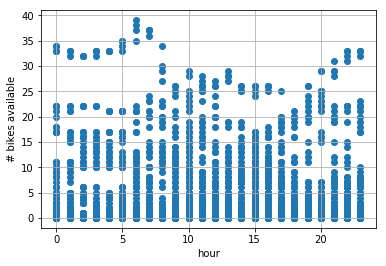

In [7]:
plt.scatter(df.hour,df.num_bikes_available)
plt.grid();
plt.xlabel('hour')
plt.ylabel('# bikes available')

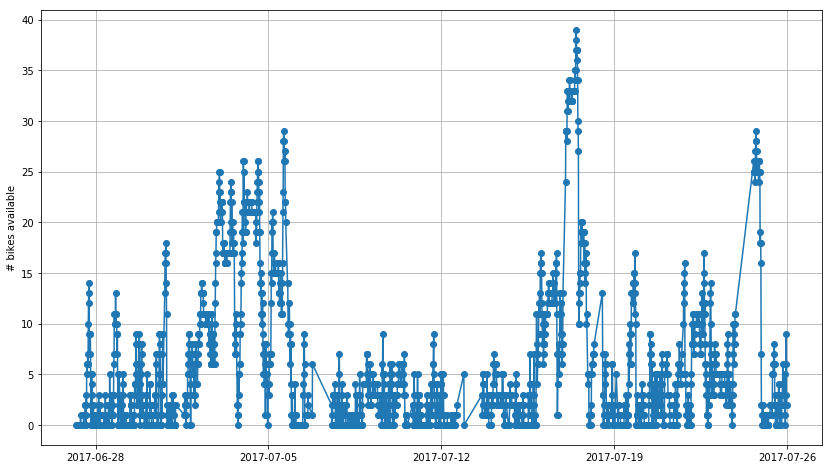

In [13]:
# ** NOTE timestamp is in UTC, which is currently UTC-4 hrs **
plt.figure(figsize=(14,8))
plt.plot(df.timestamp_utc,df.num_bikes_available,'o-')
plt.grid();
plt.ylabel('# bikes available');

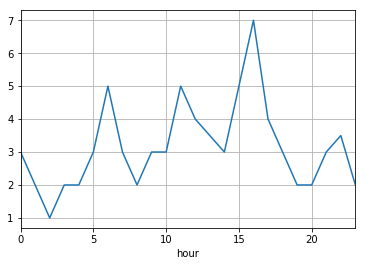

In [9]:
df.groupby('hour').num_bikes_available.median().plot()
plt.grid()
#df.hour

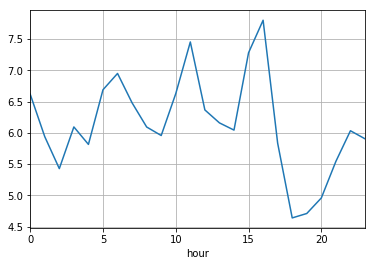

In [10]:
df.groupby('hour').num_bikes_available.mean().plot()
plt.grid()


## Try using model to predict how many bikes are available at a station?
- Or use logistic regression to predict if station is full/empty (use some threshold?)?